In [1]:
import pandas as pd
import numpy as np

In [7]:
ecom_df = pd.read_csv("ecommerce-data.csv")
ecom_df

,dateTime,country,city,region,screenRed,surveyType,purposeProductInfo,purposeBuyFromSite,purposeComparePricing,purposeInfoAndResources,...,behavReferral,behavPageviews,behavHomePage,behavDetailProdA,behavDetailProdB,behavDetailProdC,behavAnySolution,behavAnySale,behavCart,behavConversion
0,7/25/2014 14:10,United States,Monroe,LA,1280x1024,At Exit,Products,NaN,NaN,Resources,...,Direct,4 to 6,1,1,0,0,0,0,0,0
1,7/25/2014 15:01,United States,Ambler,PA,1280x800,At Exit,NaN,Buy from this site,Compare pricing,NaN,...,Unbranded Search,1,0,0,0,0,0,0,0,0
2,7/25/2014 15:15,United States,Beaumont,TX,768x1024,At Exit,NaN,NaN,Compare pricing,NaN,...,Unbranded Search,10+,0,0,0,0,1,1,0,0
3,7/25/2014 17:05,United States,Cedar City,UT,1280x960,At Exit,Products,NaN,NaN,NaN,...,Unbranded Search,10+,0,1,1,0,1,0,0,0
4,7/26/2014 0:27,United States,Bullhead City,AZ,1138x640,At Exit,NaN,NaN,NaN,Resources,...,Referred,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,9/11/2014 11:16,United States,Albany,NY,1280x1024,At Arrival and Exit,Products,NaN,Compare pricing,Resources,...,Direct,10+,1,1,1,0,0,0,0,0
1589,9/11/2014 11:18,United States,Grafton,OH,768x1024,At Arrival Only,Products,NaN,NaN,NaN,...,Direct,4 to 6,1,0,0,1,0,0,0,0
1590,9/11/2014 11:33,United States,Lansing,MI,1680x1050,At Arrival and Exit,Products,NaN,NaN,NaN,...,Unbranded Search,10+,1,0,0,0,1,0,0,0
1591,9/11/2014 11:42,United States,Saint Charles,MO,1366x768,At Arrival and Exit,NaN,NaN,NaN,Resources,...,Direct,4 to 6,0,0,1,0,0,0,0,0


In [9]:
# how many variables there are (45)
ecom_df.shape

(1593, 45)

In [6]:
#equivalent to table() in R, give us Canada as the second most
#visitors country
ecom_df["country"].value_counts()

country
United States           1361
Canada                    62
Australia                 50
United Kingdom            31
India                     13
South Africa               8
Puerto Rico                6
Israel                     4
United Arab Emirates       4
Netherlands                4
Denmark                    3
Mexico                     3
Brazil                     3
Ireland                    3
Malaysia                   3
Costa Rica                 3
Nigeria                    2
Malta                      2
Germany                    2
Philippines                2
Namibia                    1
Turkey                     1
Colombia                   1
Slovenia                   1
Italy                      1
Poland                     1
Trinidad and Tobago        1
New Zealand                1
Saudi Arabia               1
Norway                     1
Botswana                   1
Japan                      1
Thailand                   1
Singapore                  1
Panama

In [8]:
#cross table
pd.crosstab(ecom_df['intentWasPlanningToBuy'], ecom_df['profile'])

profile,Friend/family friend,Health Professional,Other,Parent,Person with [condition A],Relative,Teacher
intentWasPlanningToBuy,,,,,,,
No,0,12,5,16,0,4,9
Partially (I was considering it),1,38,19,174,8,14,35
Yes,0,24,14,96,4,11,14


In [12]:
pd.unique(ecom_df['intentWasPlanningToBuy'])

array([nan, 'Yes', 'Partially (I was considering it)', 'No'], dtype=object)

In [10]:
#calculate the proportion of parents and teachers who intended to buy
cross_table = pd.crosstab(ecom_df['intentWasPlanningToBuy'], ecom_df['profile'])
parents = cross_table['Parent']['Yes']
teachers = cross_table['Teacher']['Yes']
total = 0

for col in cross_table:
    total += sum(cross_table[col])

print(f'Parent prop: {parents/total}')
print(f'Teacher prop: {teachers/total}')

Parent prop: 0.1927710843373494
Teacher prop: 0.028112449799196786


In [11]:
#what region has the most visitors in US
ecom_df.loc[ecom_df['country'] == 'United States','region'].value_counts()

region
TX    94
NY    92
CA    90
IL    64
PA    57
FL    56
GA    50
WA    50
MA    46
MI    44
NC    42
VA    41
NJ    40
OH    40
MD    38
MO    36
CO    34
MN    33
IN    32
WI    31
TN    28
AZ    26
OR    24
OK    23
UT    21
SC    18
KS    18
KY    18
NE    16
LA    14
AR    11
CT    11
NH    10
AL     9
ME     9
ID     8
MT     7
IA     7
NM     7
SD     6
DC     6
MS     5
DE     5
ND     5
RI     5
WV     5
VT     4
NV     4
AK     3
HI     2
WY     2
Name: count, dtype: int64

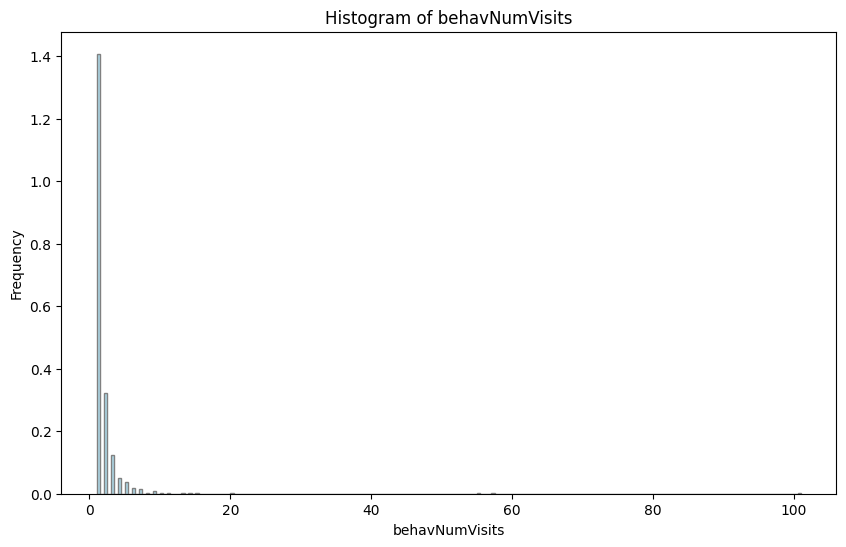

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(ecom_df['behavNumVisits'], bins=200, color='lightblue', edgecolor='grey', density=True)
plt.xlabel('behavNumVisits')
plt.ylabel('Frequency')
plt.title('Histogram of behavNumVisits')
plt.show()

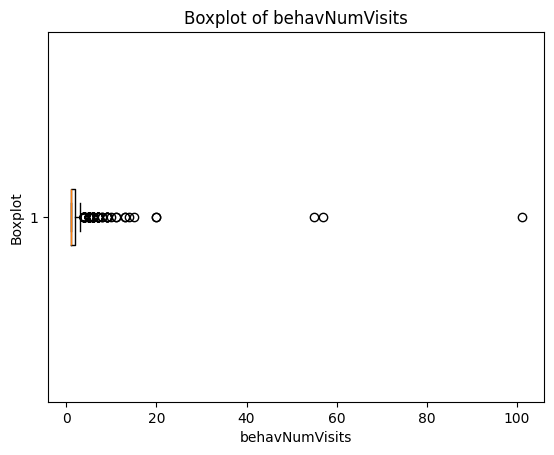

In [16]:
plt.boxplot(ecom_df['behavNumVisits'], vert=False)
plt.xlabel('behavNumVisits')
plt.ylabel('Boxplot')
plt.title('Boxplot of behavNumVisits')
plt.show()

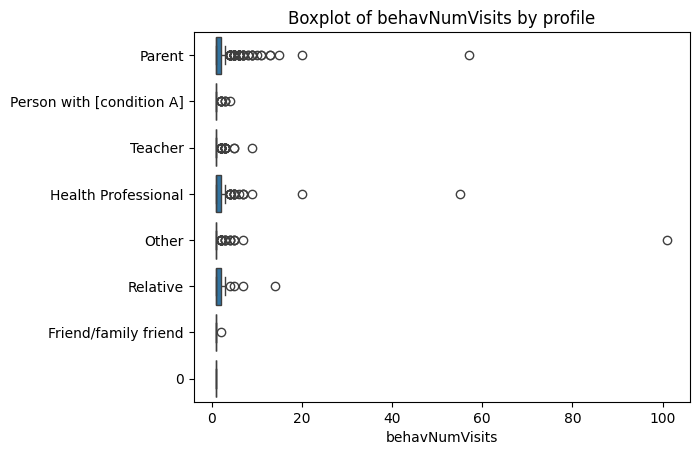

In [19]:
import seaborn as sns
sns.boxplot(x='behavNumVisits', y='profile', data=ecom_df, orient='h')
plt.xlabel('behavNumVisits')
plt.ylabel('')
plt.title('Boxplot of behavNumVisits by profile')
plt.show()

In [20]:
def MeanMedDiff(vector: np.array) -> float:
    """Return the absolute difference between Mean and Median of an array"""
    return abs(np.mean(vector)-np.median(vector))

In [22]:
MeanMedDiff(ecom_df['behavNumVisits'])

0.7715003138731953

In [24]:
MeanMedDiff(ecom_df['behavNumVisits'].drop(index=np.argmax(ecom_df['behavNumVisits'])))

0.7091708542713568

In [29]:
ecom_df.iloc[:,37:45].apply(MeanMedDiff,axis=0)

behavHomePage       0.401130
behavDetailProdA    0.369743
behavDetailProdB    0.238544
behavDetailProdC    0.116761
behavAnySolution    0.118016
behavAnySale        0.094790
behavCart           0.117389
behavConversion     0.070935
dtype: float64

In [30]:
ecom_df.iloc[:,37:45].apply(lambda x: abs(np.mean(x)-np.median(x)),axis=0)

behavHomePage       0.401130
behavDetailProdA    0.369743
behavDetailProdB    0.238544
behavDetailProdC    0.116761
behavAnySolution    0.118016
behavAnySale        0.094790
behavCart           0.117389
behavConversion     0.070935
dtype: float64